## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### Autoencoder - Demo 1

* Utilização de Autoencoder em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos.
* Exemplo baseado em: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

from tensorflow.keras.losses import MeanSquaredError

from IPython.display import Image
from tensorflow.keras.utils import plot_model

%matplotlib inline

### Carregar a base de dados e inspecionar algumas informações

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


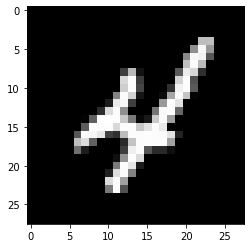

In [3]:
plt.gray()
plt.imshow(X_train[9])

### Pré-processamento

In [4]:
num_images, width, height = X_train.shape
input_size = width * height

In [5]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), input_size))
X_test = X_test.reshape((len(X_test), input_size))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


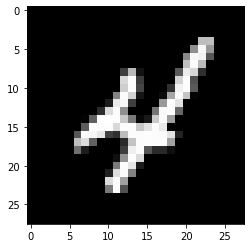

In [6]:
plt.gray()
plt.imshow(X_train[9].reshape((28, 28)))

### Modelo

#### Autoencoder

In [7]:
encoding_size = 32
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_size, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [8]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


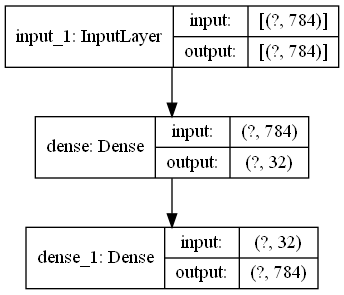

In [9]:
plot_model(autoencoder, show_shapes=True, show_layer_names=True, to_file='autoencoder.png')
Image('autoencoder.png')

#### Encoder

In [10]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


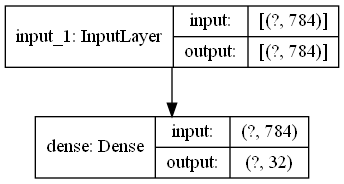

In [11]:
plot_model(encoder, show_shapes=True, show_layer_names=True, to_file='encoder.png')
Image('encoder.png')

#### Decoder

In [12]:
encoded_input = Input(shape=(encoding_size,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


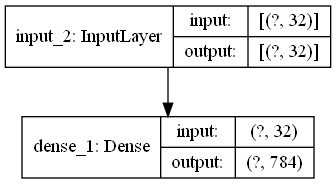

In [13]:
plot_model(decoder, show_shapes=True, show_layer_names=True, to_file='decoder.png')
Image('decoder.png')

### Treinamento

In [ ]:
# autoencoder.load_weights('trained_model_20.hdf5')

In [14]:
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

In [15]:
history = autoencoder.fit(X_train, X_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0694 - val_loss: 0.0412
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0351 - val_loss: 0.0294
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0262 - val_loss: 0.0229
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0212 - val_loss: 0.0189
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0179 - val_loss: 0.0162
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0131
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0116 - val_loss: 0.0111

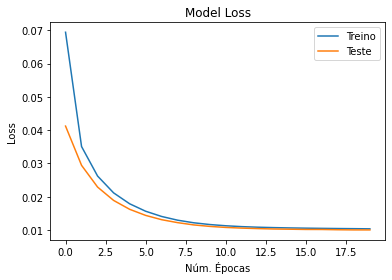

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Núm. Épocas')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

In [ ]:
#autoencoder.save_weights('trained_model_20.hdf5')

#### Avaliar resultados

In [17]:
# Fazemos o processo de encoding para reduzir as dimensões e o de decoding para reconstruir
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

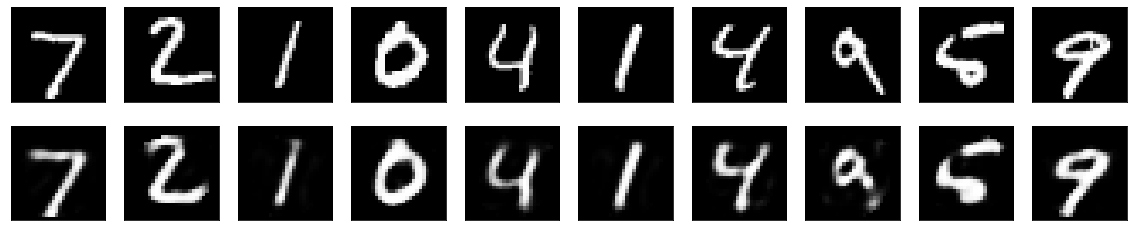

In [18]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()